In [1]:
import os
import pandas as pd
import scanpy as sc
import pickle
import anndata as ad

file_path = 'combined_all4_tcell_dat.h5ad'

# Read the h5ad file
adata = ad.read_h5ad(file_path)

# Now you can work with the AnnData object 'adata'
# For example, print its shape (observations x variables)
print(adata.shape)

# Print summary information
print(adata)

(15873, 15785)
AnnData object with n_obs × n_vars = 15873 × 15785
    obs: 'SampleId', 'percent.mt', 'exp_num', 'active_ident', 'Cell_Type', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'CD8T_core9', 'CD8T_cytokine', 'Major_cell_type', 'leiden', 'session_id'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'mean', 'std'
    uns: 'Cell_Type_colors', 'IES_status_colors', 'SampleId_colors', 'exp_num_colors', 'leiden_colors', 'leiden_dge', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsin'
    obsp: 'connectivities', 'distances'


In [2]:
adata.X

<15873x15785 sparse matrix of type '<class 'numpy.float32'>'
	with 12458778 stored elements in Compressed Sparse Row format>

In [3]:
adata_raw = adata.copy() 
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [4]:
all_genes = set(adata.var.index.values)
markers = {
    "CD4": ["FOXP3", "IL2RA", "CD4"], #"TRBC2" [CD3D, CD3E, CXCR4, IL7R, LTB, TRBC2] ["IL7R", "CCR7","FOXP3"]  ["CD4", "IL7R", "TRBC2"] https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2023.1151109/full
    "CD8": ["CD8A", "CD8B"], #"NKG7" ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "NKG7", "PRF1", "GNLY", "CCR5", "CXCR3"]
}
for cell_type, gene_list in markers.items():
    present = [g for g in gene_list if g in all_genes]
    missing = [g for g in gene_list if g not in all_genes]
    print(f"{cell_type} markers:")
    print(" • present:", present)
    print(" • missing:", missing, "\n")

CD4 markers:
 • present: ['FOXP3', 'IL2RA', 'CD4']
 • missing: [] 

CD8 markers:
 • present: ['CD8A']
 • missing: ['CD8B'] 



In [5]:
# CD8B is missing from the dataset, we will adjust the marker
markers = {
    "CD4": ["FOXP3", "IL2RA", "CD4"], #"TRBC2" [CD3D, CD3E, CXCR4, IL7R, LTB, TRBC2] ["IL7R", "CCR7","FOXP3"]  ["CD4", "IL7R", "TRBC2"] https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2023.1151109/full
    "CD8": ["CD8A"], #"NKG7" ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "NKG7", "PRF1", "GNLY", "CCR5", "CXCR3"]
}

In [6]:
adata.obs

,SampleId,percent.mt,exp_num,active_ident,Cell_Type,n_genes_by_counts,total_counts,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,CD8T_core9,CD8T_cytokine,Major_cell_type,leiden,session_id
AAACAAGCAAGCGATC-1,9142_s2,1.036269,9142,NaN,T memory cells,507,579.0,46.977547,98.791019,-0.414785,-0.208941,Immune,0,s2
AAACCAATCACTGTCA-1,9142_s2,2.550091,9142,NaN,T cells,475,549.0,49.908925,100.000000,0.169314,0.378023,Immune,0,s2
AAACTGGGTCATGATC-1,9142_s2,0.941620,9142,NaN,T memory cells,462,531.0,50.659134,100.000000,-0.431116,-0.129162,Immune,0,s2
AAACTGGGTTGCACTG-1,9142_s2,1.679104,9142,NaN,T memory cells,464,536.0,50.746269,100.000000,-0.456260,-0.358121,Immune,0,s2
AAAGCGAAGACTCCTA-1,9142_s2,0.751697,9142,NaN,T cells,2706,4124.0,22.890398,39.597478,0.032277,-0.110426,Immune,0,s2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTAGTCAGTTTCGGCATGTTGAC-1,10284_s4,6.644675,10284,7_T cells,T cells,1557,2122.0,31.621112,50.188501,-0.459254,-0.356736,Immune,18,s4
TTTCGCGCACCGGCAAATGTTGAC-1,10284_s4,3.396603,10284,8_T cells,T cells,817,1001.0,38.361638,68.331668,0.497221,0.158574,Immune,0,s4
TTTGCGGGTATGGGACATGTTGAC-1,10284_s4,2.406015,10284,7_T cells,T cells,567,665.0,44.812030,89.924812,-0.210418,-0.420423,Immune,0,s4
TTTGCGGGTGCGGCTTATGTTGAC-1,10284_s4,3.059273,10284,7_T cells,T cells,476,523.0,47.227533,100.000000,-0.483018,-0.309437,Immune,0,s4


In [7]:
%matplotlib inline

hvg_n         = 5000                           # #HVGs to keep
leiden_res    = 0.6                            # tweak for cluster granularity

# -------------------- feature selection & scaling -------------------------
sc.pp.highly_variable_genes(adata_raw, n_top_genes=hvg_n,  flavor="seurat_v3")

In [8]:
adata_all = adata[:, adata_raw.var["highly_variable"]]  # subset to HVGs
print(adata_all)

View of AnnData object with n_obs × n_vars = 15873 × 5000
    obs: 'SampleId', 'percent.mt', 'exp_num', 'active_ident', 'Cell_Type', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'CD8T_core9', 'CD8T_cytokine', 'Major_cell_type', 'leiden', 'session_id'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'mean', 'std'
    uns: 'Cell_Type_colors', 'IES_status_colors', 'SampleId_colors', 'exp_num_colors', 'leiden_colors', 'leiden_dge', 'neighbors', 'pca', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsin'
    obsp: 'connectivities', 'distances'


In [9]:
all_genes = set(adata_all.var.index.values)

for cell_type, gene_list in markers.items():
    present = [g for g in gene_list if g in all_genes]
    missing = [g for g in gene_list if g not in all_genes]
    print(f"{cell_type} markers:")
    print(" • present:", present)
    print(" • missing:", missing, "\n")

CD4 markers:
 • present: ['FOXP3', 'IL2RA', 'CD4']
 • missing: [] 

CD8 markers:
 • present: ['CD8A']
 • missing: [] 



In [10]:
%matplotlib inline
sc.pp.scale(adata_all, max_value=10)

# ----------------------- dimensionality + clustering ----------------------
sc.tl.pca(adata_all, svd_solver="arpack")
sc.external.pp.harmony_integrate(adata_all, key='SampleId')

#  build neighborhood graph & UMAP on the *corrected* embedding
sc.pp.neighbors(adata_all, use_rep='X_pca_harmony')

sc.tl.leiden(adata_all, resolution=leiden_res, key_added="cluster")
sc.tl.umap(adata_all)  

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
2025-05-01 23:51:55,901 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-01 23:51:59,081 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-01 23:51:59,130 - harmonypy - INFO - Iteration 1 of 10
2025-05-01 23:52:02,596 - harmonypy - INFO - Iteration 2 of 10
2025-05-01 23:52:06,063 - harmonypy - INFO - Iteration 3 of 10
2025-05-01 23:52:08,908 - harmonypy - INFO - Iteration 4 of 10
2025-05-01 23:52:10,827 - harmonypy - INFO - Iteration 5 of 10
2025-05-01 23:52:12,771 - harmonypy - INFO - Iteration 6 of 10
2025-05-01 23:52:14,849 - harmonypy - INFO - Iteration 7 of 10
2025-05-01 23:52:16,671 - harmonypy - INFO - Converged after 7 iterations
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarnin

In [11]:
adata_all.var_names = adata_all.var.index

sc.tl.score_genes(adata_all, gene_list=markers["CD4"], score_name="CD4_score")
sc.tl.score_genes(adata_all, gene_list=markers["CD8"], score_name="CD8_score")

# coarse per‑cluster means
clust_means = (
    adata_all.obs[["cluster", "CD4_score", "CD8_score"]]
    .groupby("cluster")
    .mean()
)
clust_means

,CD4_score,CD8_score
cluster,,
0,-0.198480,0.568606
1,-0.065679,-0.234612
2,0.009195,-0.280476
3,-0.207854,-0.039989
4,0.490989,-0.322646
5,-0.223465,0.150142
6,-0.081698,-0.032650
7,-0.038011,-0.156405
8,-0.283167,-0.317410


In [12]:
import numpy as np
# label clusters: whichever marker score is higher
clust_means["predicted_type"] = np.where(
    clust_means["CD4_score"] > clust_means["CD8_score"], "CD4", "CD8"
)


# map back to every cell
adata_all.obs["CD_type_by_cluster"] = (
    adata_all.obs["cluster"].map(clust_means["predicted_type"])
)

In [13]:
all_genes = set(adata_all.var.index.values)

for cell_type, gene_list in markers.items():
    present = [g for g in gene_list if g in all_genes]
    missing = [g for g in gene_list if g not in all_genes]
    print(f"{cell_type} markers:")
    print(" • present:", present)
    print(" • missing:", missing, "\n")

CD4 markers:
 • present: ['FOXP3', 'IL2RA', 'CD4']
 • missing: [] 

CD8 markers:
 • present: ['CD8A']
 • missing: [] 



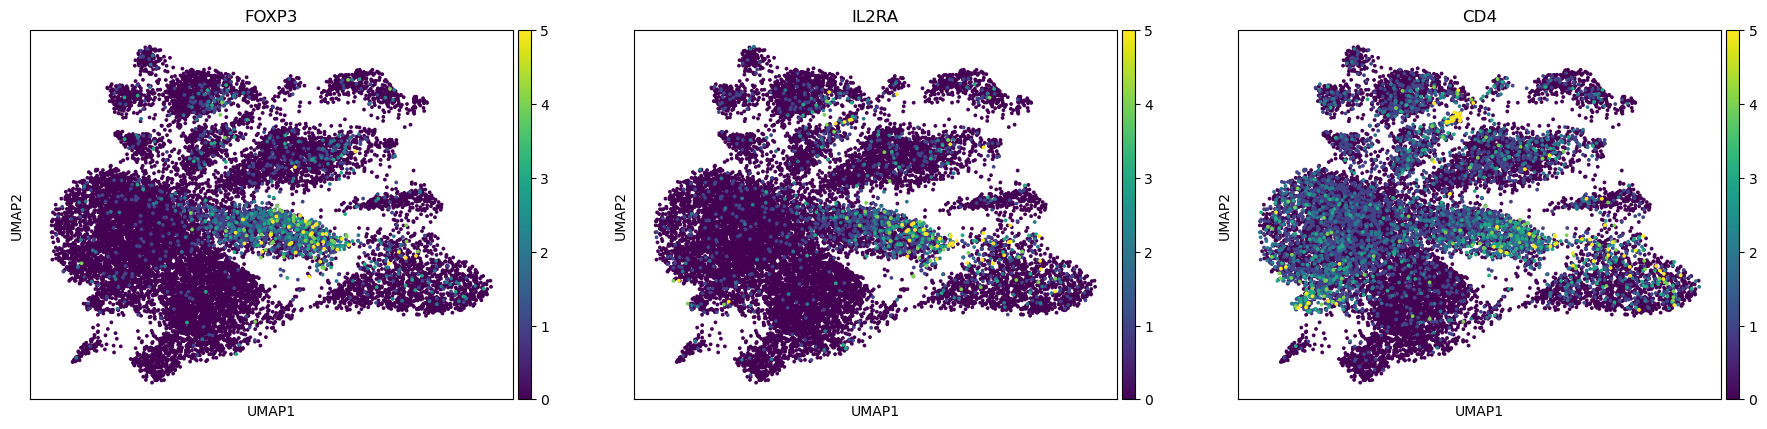

In [14]:
%matplotlib inline

marker_genes_CD4 = markers["CD4"]
marker_genes_CD8 = markers["CD8"]
# now plot cluster / annotation + all marker genes in one go
sc.pl.umap(
    adata_all,
    color=marker_genes_CD4,
    ncols=5,                # how many panels per row
    size=30,                # dot size
    legend_loc="right margin",
    cmap="viridis",  
    vmax = 5 # continuous color map for gene expr.
)

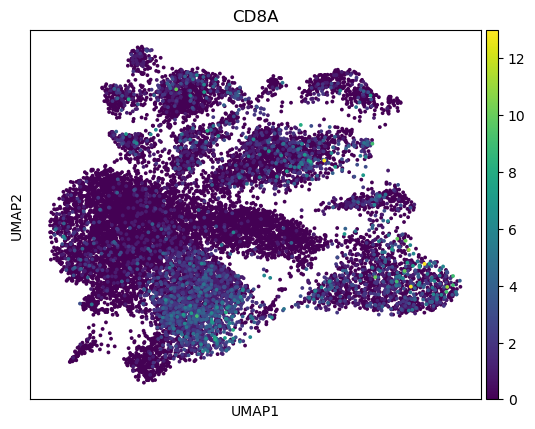

In [15]:
sc.pl.umap(
    adata_all,
    color=marker_genes_CD8,
    ncols=5,                # how many panels per row
    size=30,                # dot size
    legend_loc="right margin",
    cmap="viridis",         # continuous color map for gene expr.
)

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


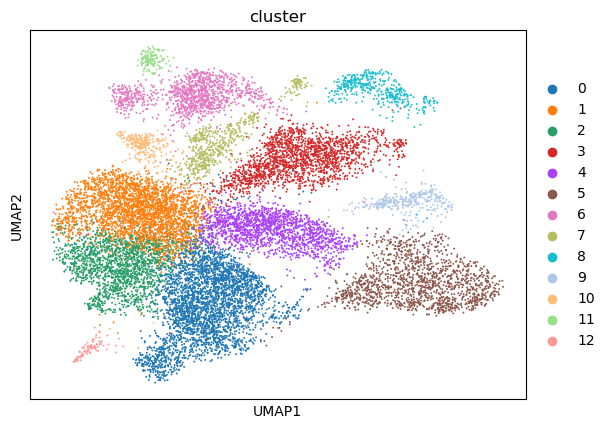

In [16]:
%matplotlib inline
sc.pl.umap(adata_all, color=["cluster"])

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


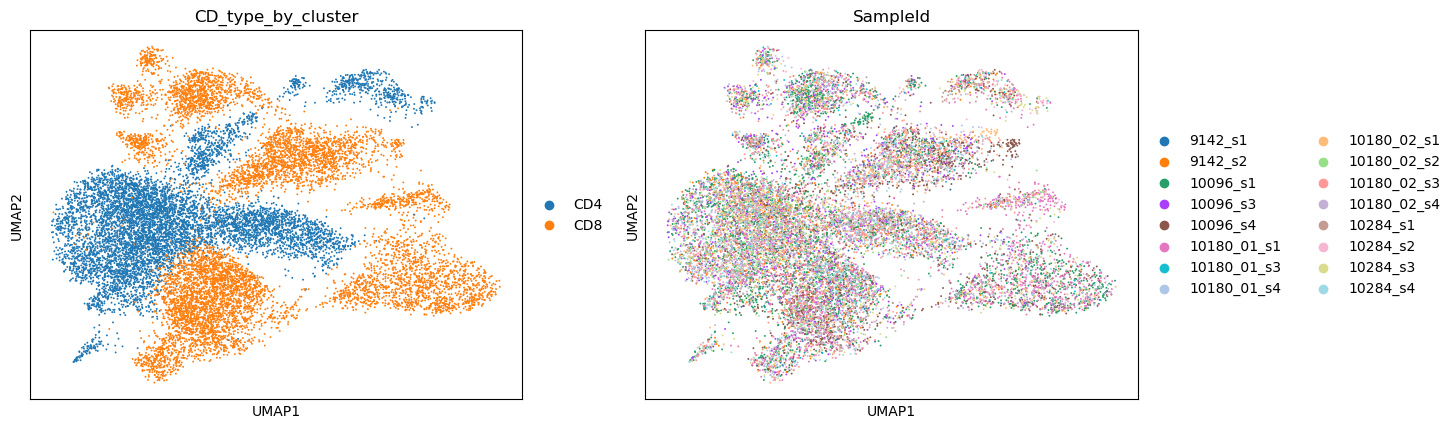

In [17]:
%matplotlib inline
sc.pl.umap(adata_all, color=["CD_type_by_cluster", "SampleId"])

In [18]:
adata_all.obs

,SampleId,percent.mt,exp_num,active_ident,Cell_Type,n_genes_by_counts,total_counts,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,CD8T_core9,CD8T_cytokine,Major_cell_type,leiden,session_id,cluster,CD4_score,CD8_score,CD_type_by_cluster
AAACAAGCAAGCGATC-1,9142_s2,1.036269,9142,NaN,T memory cells,507,579.0,46.977547,98.791019,-0.414785,-0.208941,Immune,0,s2,4,-0.242424,-0.18,CD4
AAACCAATCACTGTCA-1,9142_s2,2.550091,9142,NaN,T cells,475,549.0,49.908925,100.000000,0.169314,0.378023,Immune,0,s2,0,-0.131313,-0.22,CD8
AAACTGGGTCATGATC-1,9142_s2,0.941620,9142,NaN,T memory cells,462,531.0,50.659134,100.000000,-0.431116,-0.129162,Immune,0,s2,1,-0.151515,-0.28,CD4
AAACTGGGTTGCACTG-1,9142_s2,1.679104,9142,NaN,T memory cells,464,536.0,50.746269,100.000000,-0.456260,-0.358121,Immune,0,s2,1,-0.212121,0.70,CD4
AAAGCGAAGACTCCTA-1,9142_s2,0.751697,9142,NaN,T cells,2706,4124.0,22.890398,39.597478,0.032277,-0.110426,Immune,0,s2,6,-1.030303,-0.82,CD8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTAGTCAGTTTCGGCATGTTGAC-1,10284_s4,6.644675,10284,7_T cells,T cells,1557,2122.0,31.621112,50.188501,-0.459254,-0.356736,Immune,18,s4,3,0.434343,-0.92,CD8
TTTCGCGCACCGGCAAATGTTGAC-1,10284_s4,3.396603,10284,8_T cells,T cells,817,1001.0,38.361638,68.331668,0.497221,0.158574,Immune,0,s4,0,-0.363636,2.48,CD8
TTTGCGGGTATGGGACATGTTGAC-1,10284_s4,2.406015,10284,7_T cells,T cells,567,665.0,44.812030,89.924812,-0.210418,-0.420423,Immune,0,s4,4,0.141414,-0.24,CD4
TTTGCGGGTGCGGCTTATGTTGAC-1,10284_s4,3.059273,10284,7_T cells,T cells,476,523.0,47.227533,100.000000,-0.483018,-0.309437,Immune,0,s4,1,-0.111111,-0.18,CD4


In [19]:

with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})



def average_genes(genes_list, df):
    valid_genes = [g for g in genes_list if g in df.columns]
    if len(valid_genes) == 0:
        return np.repeat(np.nan, df.shape[0])
    sub_df = df[valid_genes]
    return sub_df.mean(axis=1)  # mean over columns => per-cell average

def match_genes_in_sets(sigs_CD8, se2):    
    # Dictionary to hold matched genes for each set
    gs = {}
    # Loop over each key in the sigs_CD8 dictionary
    for s1 in sigs_CD8.keys():
        # 'sigs_CD8[s1]' is a list of genes
        # We'll find which of these genes appear in se2.index
        matched_genes = []
        
        for gene in sigs_CD8[s1]:
            if gene in se2.index.tolist():
                matched_genes.append(gene)
        
        # Print match info
        print(f"{s1}: {len(matched_genes)}/{len(sigs_CD8[s1])} genes are found.")
        
        # Store in gs
        gs[s1] = matched_genes
    return


{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [20]:
adata.obs

,SampleId,percent.mt,exp_num,active_ident,Cell_Type,n_genes_by_counts,total_counts,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,CD8T_core9,CD8T_cytokine,Major_cell_type,leiden,session_id
AAACAAGCAAGCGATC-1,9142_s2,1.036269,9142,NaN,T memory cells,507,579.0,46.977547,98.791019,-0.414785,-0.208941,Immune,0,s2
AAACCAATCACTGTCA-1,9142_s2,2.550091,9142,NaN,T cells,475,549.0,49.908925,100.000000,0.169314,0.378023,Immune,0,s2
AAACTGGGTCATGATC-1,9142_s2,0.941620,9142,NaN,T memory cells,462,531.0,50.659134,100.000000,-0.431116,-0.129162,Immune,0,s2
AAACTGGGTTGCACTG-1,9142_s2,1.679104,9142,NaN,T memory cells,464,536.0,50.746269,100.000000,-0.456260,-0.358121,Immune,0,s2
AAAGCGAAGACTCCTA-1,9142_s2,0.751697,9142,NaN,T cells,2706,4124.0,22.890398,39.597478,0.032277,-0.110426,Immune,0,s2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTAGTCAGTTTCGGCATGTTGAC-1,10284_s4,6.644675,10284,7_T cells,T cells,1557,2122.0,31.621112,50.188501,-0.459254,-0.356736,Immune,18,s4
TTTCGCGCACCGGCAAATGTTGAC-1,10284_s4,3.396603,10284,8_T cells,T cells,817,1001.0,38.361638,68.331668,0.497221,0.158574,Immune,0,s4
TTTGCGGGTATGGGACATGTTGAC-1,10284_s4,2.406015,10284,7_T cells,T cells,567,665.0,44.812030,89.924812,-0.210418,-0.420423,Immune,0,s4
TTTGCGGGTGCGGCTTATGTTGAC-1,10284_s4,3.059273,10284,7_T cells,T cells,476,523.0,47.227533,100.000000,-0.483018,-0.309437,Immune,0,s4


In [21]:
import gseapy as gp
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
match_genes_in_sets(sigs_CD8, adata.var)
match_genes_in_sets(sigs_CD4, adata.var)
sets_ave = ["Hanada_pos_27g", "Oliveira_virus_26g", "Hanada_neg_5g"]
sets_ave_CD4 = ["Hanada_pos_9g", "Hanada_neg_4g"]
# Identify the rest for ssGSEA
ssgsea_sets = {k: v for k, v in sigs_CD8.items() if k not in sets_ave}
ssgsea_sets_CD4 = {k: v for k, v in sigs_CD4.items() if k not in sets_ave}
# gseapy.ssgsea expects a DataFrame where rows = genes, columns = samples.
# So let's invert adata back: adata.X => n_cells x n_genes
# We need genes x cells. We'll build a small data frame:

expr_for_ssgsea = pd.DataFrame(
    adata.X.transpose().toarray()  ,
    index=adata.var.index.tolist(),   # Genes
    columns=adata.obs.index.tolist()
)

Lowery_pos_243g: 222/243 genes are found.
Oliveira_TTE_100g: 95/100 genes are found.
Oliveira_pos_74g: 66/74 genes are found.
Yost_CD8_Exh_100g: 92/100 genes are found.
Hanada_pos_27g: 21/27 genes are found.
Lowery_neg_99g: 61/99 genes are found.
Oliveira_virus_26g: 26/26 genes are found.
Hanada_neg_5g: 2/5 genes are found.
Lowery_pos_40g: 38/40 genes are found.
Jansen_TermDiff_73g: 65/73 genes are found.
Caushi_Tfh2_66g: 61/66 genes are found.
Oh_CXCL13_50g: 48/50 genes are found.
Hanada_pos_9g: 8/9 genes are found.
Lowery_neg_37g: 32/37 genes are found.
Hanada_neg_4g: 3/4 genes are found.


In [22]:
# gseapy ssgsea
# Each gene set is a list of genes. We'll create the required format for gseapy.
# gseapy requires: gene_sets = { 'set_name': [gene1, gene2, ... ], ... }

# The result of ssGSEA is a DataFrame with sets on rows, samples on columns.
# Then we can transpose to get sample x sets. 

# Large gene lists can be somewhat slow for ssGSEA. 
# Adjust min_size, max_size, if needed to skip too small/large sets:
ssgsea_results = gp.ssgsea(data=expr_for_ssgsea,
                           gene_sets=ssgsea_sets,
                           sample_norm=False, # We already normalized above
                           outdir=None,        # don't write to disk
                           min_size=1,
                           max_size=20000)
ssgsea_results.run()
ssgsea_scores = ssgsea_results.res2d # shape = #sets x #cells
# Transpose to cell x set
df_wide = ssgsea_scores.pivot(
    index='Name',    # Each sample’s name/ID
    columns='Term',  # The gene set name
    values='NES'      # Which score you want to spread out as columns
)
# rename columns
df_wide.columns = [f"CD8{col}" for col in df_wide.columns]
# ----------------------------------------------------------------
# Compute average expression for certain sets
# ----------------------------------------------------------------
# We'll get the log-transformed data from adata.X: (n_cells, n_genes)
# We'll define a small helper to average genes from 'gs'

adata_df = pd.DataFrame(adata.X.toarray(), 
                        index=adata.obs_names, 
                        columns=adata.var.index.tolist())



ave_Hanada_pos_27g = average_genes(sigs_CD8["Hanada_pos_27g"], adata_df)
ave_Hanada_neg_5g  = average_genes(sigs_CD8["Hanada_neg_5g"],  adata_df)
ave_Oliveira_virus_26g = average_genes(sigs_CD8["Oliveira_virus_26g"], adata_df)

# Now combine them with ssgsea_scores
# The original code merges them in a single data.frame
# We'll do the same:
signature_df = pd.DataFrame(index=adata.obs.index)
signature_df["ave_Hanada_pos_27g"] = ave_Hanada_pos_27g.values
signature_df["ave_Hanada_neg_5g"]  = ave_Hanada_neg_5g.values
signature_df["ave_Oliveira_virus_26g"] = ave_Oliveira_virus_26g.values

df_combined = df_wide.join(signature_df, how="inner")
ssgsea_results_CD4 = gp.ssgsea(data=expr_for_ssgsea,
                           gene_sets=ssgsea_sets_CD4,
                           sample_norm=False, # We already normalized above
                           outdir=None,        # don't write to disk
                           min_size=1,
                           max_size=20000)
ssgsea_results_CD4.run()
ssgsea_scores_CD4 = ssgsea_results_CD4.res2d # shape = #sets x #cells
# Transpose to cell x set
df_wide_CD4 = ssgsea_scores_CD4.pivot(
    index='Name',    # Each sample’s name/ID
    columns='Term',  # The gene set name
    values='NES'      # Which score you want to spread out as columns
)
# rename columns 
df_wide_CD4.columns = [f"CD4{col}" for col in df_wide_CD4.columns]
# ----------------------------------------------------------------
# Compute average expression for certain sets
# ----------------------------------------------------------------    

ave_Hanada_pos_9g = average_genes(sigs_CD4["Hanada_pos_9g"], adata_df)
ave_Hanada_neg_4g = average_genes(sigs_CD4["Hanada_neg_4g"], adata_df)

# Now combine them with ssgsea_scores
# The original code merges them in a single data.frame
# We'll do the same:
signature_df_CD4 = pd.DataFrame(index=adata.obs.index)
signature_df_CD4["Hanada_pos_9g"] = ave_Hanada_pos_9g.values
signature_df_CD4["Hanada_neg_4g"] = ave_Hanada_neg_4g.values

df_combined_CD4 = df_wide_CD4.join(signature_df_CD4, how="inner")
df_CD4_CD8 = df_combined.join(df_combined_CD4, how="inner")
df_CD4_CD8

,CD8Lowery_neg_99g,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,CD4Caushi_Tfh2_66g,CD4Hanada_neg_4g,CD4Hanada_pos_9g,CD4Jansen_TermDiff_73g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g
AAACAAGCAACAGGCTATGTTGAC-1,0.294664,0.23691,0.311816,0.263164,0.328733,1.707691,0.951147,0.096842,0.10968,0.419003,0.358856,0.036626,0.260078,0.041041,0.012463,1.544014,1.821185
AAACAAGCAAGACATTACTTTAGG-1,0.422543,-0.063011,-0.068414,-0.068403,-0.045587,0.753495,1.446179,0.395810,0.047895,0.277222,-0.207791,-0.034206,0.058829,-0.017206,0.00359,0.281647,0.751058
AAACAAGCAAGATGCCACTTTAGG-1,0.280893,-0.135988,-0.043401,-0.140251,-0.124163,0.393041,1.375643,0.317456,0.005828,0.1412,-0.311669,-0.032313,0.106113,-0.016772,-0.035081,0.000000,0.917095
AAACAAGCAAGATGCCATGTTGAC-1,0.340535,-0.063816,-0.078808,-0.083262,-0.08031,0.134487,1.412112,0.108624,-0.03049,0.069882,-0.141115,-0.036386,0.144671,-0.062505,-0.034774,0.435906,0.000000
AAACAAGCAAGCGATC-1,0.201135,-0.09684,-0.062667,-0.072018,-0.067182,0.000000,1.452662,0.223486,0.025549,0.147707,-0.308778,-0.032976,0.029209,-0.073653,-0.070344,0.000000,1.322255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAGTCCTCCATATGTTGAC-1,0.472455,0.279557,0.282262,0.254703,0.40228,1.511670,0.763561,0.176206,0.12224,0.12446,0.205063,0.063967,0.29628,0.114877,0.00283,1.301174,1.377231
TTTGTGAGTGGTTCTGACTTTAGG-1,0.178979,-0.015709,-0.017713,-0.094056,-0.039362,0.195383,0.000000,0.584026,-0.030628,0.075676,-0.144209,-0.016567,0.188497,-0.079638,-0.076412,0.379617,0.000000
TTTGTGAGTGTCCTTCATGTTGAC-1,0.273406,0.133106,0.246296,0.170583,0.344503,1.704579,1.127349,0.173438,0.219947,0.280515,0.07428,0.016653,0.159937,0.25945,0.103871,1.171599,0.751566
TTTGTGAGTTAGTTTGACTTTAGG-1,0.223631,-0.017781,0.118182,0.069174,0.11282,1.133961,1.067504,0.270663,0.155794,0.555935,-0.038022,0.009001,0.062726,0.102052,0.039559,0.823781,1.423339


In [23]:
obj_cols = df_CD4_CD8 \
           .select_dtypes(include='object') \
           .columns.tolist()
df_CD4_CD8[obj_cols] = df_CD4_CD8[obj_cols].apply(
    pd.to_numeric,
    errors='coerce' 
)

In [24]:
df = df_CD4_CD8.join(adata_all.obs)
df

,CD8Lowery_neg_99g,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,CD4Caushi_Tfh2_66g,CD4Hanada_neg_4g,...,pct_counts_in_top_500_genes,CD8T_core9,CD8T_cytokine,Major_cell_type,leiden,session_id,cluster,CD4_score,CD8_score,CD_type_by_cluster
AAACAAGCAACAGGCTATGTTGAC-1,0.294664,0.236910,0.311816,0.263164,0.328733,1.707691,0.951147,0.096842,0.109680,0.419003,...,53.990878,0.976549,0.550665,Immune,15,02_s4,5,-0.656566,3.08,CD8
AAACAAGCAAGACATTACTTTAGG-1,0.422543,-0.063011,-0.068414,-0.068403,-0.045587,0.753495,1.446179,0.395810,0.047895,0.277222,...,59.576271,-0.411275,-0.333484,Immune,0,s1,6,0.686869,-0.58,CD8
AAACAAGCAAGATGCCACTTTAGG-1,0.280893,-0.135988,-0.043401,-0.140251,-0.124163,0.393041,1.375643,0.317456,0.005828,0.141200,...,87.390029,-0.234810,-0.519599,Immune,1,s1,7,0.181818,-0.16,CD4
AAACAAGCAAGATGCCATGTTGAC-1,0.340535,-0.063816,-0.078808,-0.083262,-0.080310,0.134487,1.412112,0.108624,-0.030490,0.069882,...,87.797147,-0.345932,-0.216466,Immune,0,s4,3,-0.080808,-0.16,CD8
AAACAAGCAAGCGATC-1,0.201135,-0.096840,-0.062667,-0.072018,-0.067182,0.000000,1.452662,0.223486,0.025549,0.147707,...,98.791019,-0.414785,-0.208941,Immune,0,s2,4,-0.242424,-0.18,CD4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAGTCCTCCATATGTTGAC-1,0.472455,0.279557,0.282262,0.254703,0.402280,1.511670,0.763561,0.176206,0.122240,0.124460,...,51.946647,0.504414,0.433617,Immune,15,s4,5,-0.919192,3.54,CD8
TTTGTGAGTGGTTCTGACTTTAGG-1,0.178979,-0.015709,-0.017713,-0.094056,-0.039362,0.195383,0.000000,0.584026,-0.030628,0.075676,...,100.000000,1.146133,0.643411,Immune,0,01_s1,0,-0.141414,-0.28,CD8
TTTGTGAGTGTCCTTCATGTTGAC-1,0.273406,0.133106,0.246296,0.170583,0.344503,1.704579,1.127349,0.173438,0.219947,0.280515,...,66.126280,0.253055,-0.179320,Immune,0,s4,2,0.020202,-0.64,CD4
TTTGTGAGTTAGTTTGACTTTAGG-1,0.223631,-0.017781,0.118182,0.069174,0.112820,1.133961,1.067504,0.270663,0.155794,0.555935,...,57.568978,-0.131725,-0.301515,Immune,0,s1,4,1.383838,-0.70,CD4


In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8Lowery_pos_243g", 
    "CD8Oliveira_TTE_100g", 
    "CD8Oliveira_pos_74g", 
    "CD8Yost_CD8_Exh_100g", 
    "ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    #"CD8Lowery_neg_99g",
    "ave_Hanada_neg_5g", 
    "ave_Oliveira_virus_26g",
]

pos_sigs_CD4 = [
    "CD4Hanada_pos_9g", 
    "CD4Caushi_Tfh2_66g", 
    "CD4Jansen_TermDiff_73g", 
    "CD4Lowery_pos_40g", 
    "CD4Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4Lowery_neg_37g", 
    "CD4Hanada_neg_4g"
]


def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df[df["CD_type_by_cluster"]==cell_type].copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    sub[cols] = sub[cols].transform(lambda x: (x - x.mean()) / x.std(ddof=0))

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = sub[pos_sigs].mean(axis=1)
    sub[f"neg_score_{cell_type}"] = sub[neg_sigs].mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub

# run it for each cell‐type
cd8_called = classify_cells(df, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called = classify_cells(df, "CD4", pos_sigs_CD4, neg_sigs_CD4)

df_combined = pd.concat([cd8_called, cd4_called]).sort_index()
df_combined

,CD8Lowery_neg_99g,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,CD4Caushi_Tfh2_66g,CD4Hanada_neg_4g,...,cluster,CD4_score,CD8_score,CD_type_by_cluster,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4
AAACAAGCAACAGGCTATGTTGAC-1,0.294664,2.522856,3.371738,3.395399,2.930148,3.598814,-0.077901,-0.950715,0.109680,0.419003,...,5,-0.656566,3.08,CD8,3.163791,-0.514308,True,NaN,NaN,NaN
AAACAAGCAAGACATTACTTTAGG-1,0.422543,-0.625548,-0.789712,-0.383539,-0.527928,0.618407,0.390794,0.614518,0.047895,0.277222,...,6,0.686869,-0.58,CD8,-0.341664,0.502656,False,NaN,NaN,NaN
AAACAAGCAAGATGCCACTTTAGG-1,0.280893,-0.135988,-0.043401,-0.140251,-0.124163,0.393041,1.375643,0.317456,-0.688419,-0.446802,...,7,0.181818,-0.16,CD4,NaN,NaN,NaN,-0.577773,-0.315344,False
AAACAAGCAAGATGCCATGTTGAC-1,0.340535,-0.633995,-0.903479,-0.552895,-0.848714,-1.315049,0.358539,-0.889033,-0.030490,0.069882,...,3,-0.080808,-0.16,CD8,-0.850826,-0.265247,False,NaN,NaN,NaN
AAACAAGCAAGCGATC-1,0.201135,-0.096840,-0.062667,-0.072018,-0.067182,0.000000,1.452662,0.223486,-0.324023,-0.403325,...,4,-0.242424,-0.18,CD4,NaN,NaN,NaN,-0.843675,-0.798767,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAGTCCTCCATATGTTGAC-1,0.472455,2.970544,3.048282,3.298969,3.609593,2.986547,-0.255507,-0.535208,0.122240,0.124460,...,5,-0.919192,3.54,CD8,3.182787,-0.395358,True,NaN,NaN,NaN
TTTGTGAGTGGTTCTGACTTTAGG-1,0.178979,-0.128998,-0.234816,-0.675910,-0.470423,-1.124842,-0.978444,1.599914,-0.030628,0.075676,...,0,-0.141414,-0.28,CD8,-0.526998,0.310735,False,NaN,NaN,NaN
TTTGTGAGTGTCCTTCATGTTGAC-1,0.273406,0.133106,0.246296,0.170583,0.344503,1.704579,1.127349,0.173438,3.268056,0.484124,...,2,0.020202,-0.64,CD4,NaN,NaN,NaN,2.821210,0.503670,False
TTTGTGAGTTAGTTTGACTTTAGG-1,0.223631,-0.017781,0.118182,0.069174,0.112820,1.133961,1.067504,0.270663,2.082631,2.324527,...,4,1.383838,-0.70,CD4,NaN,NaN,NaN,1.551581,0.785323,False


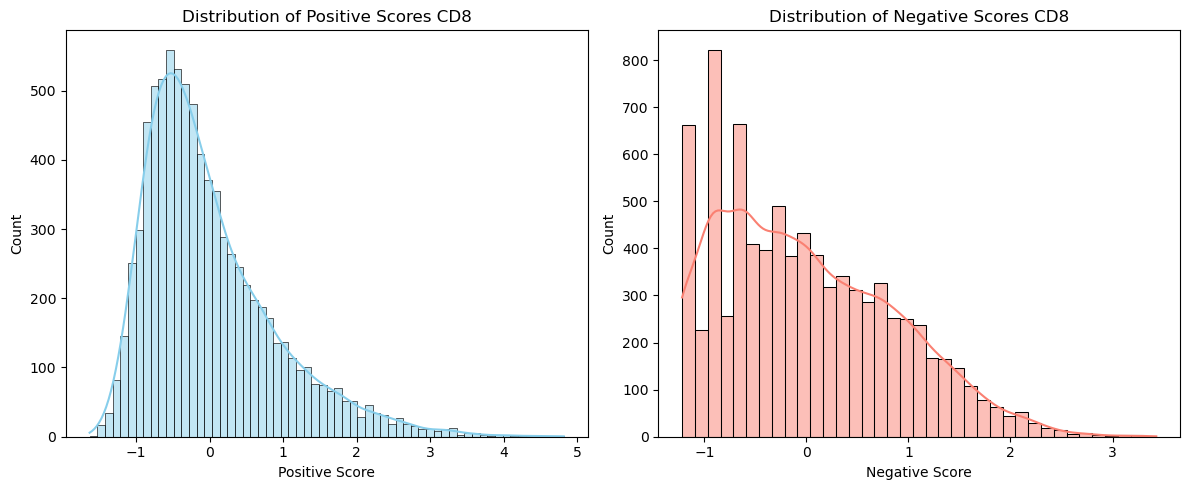

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_combined['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(df_combined['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

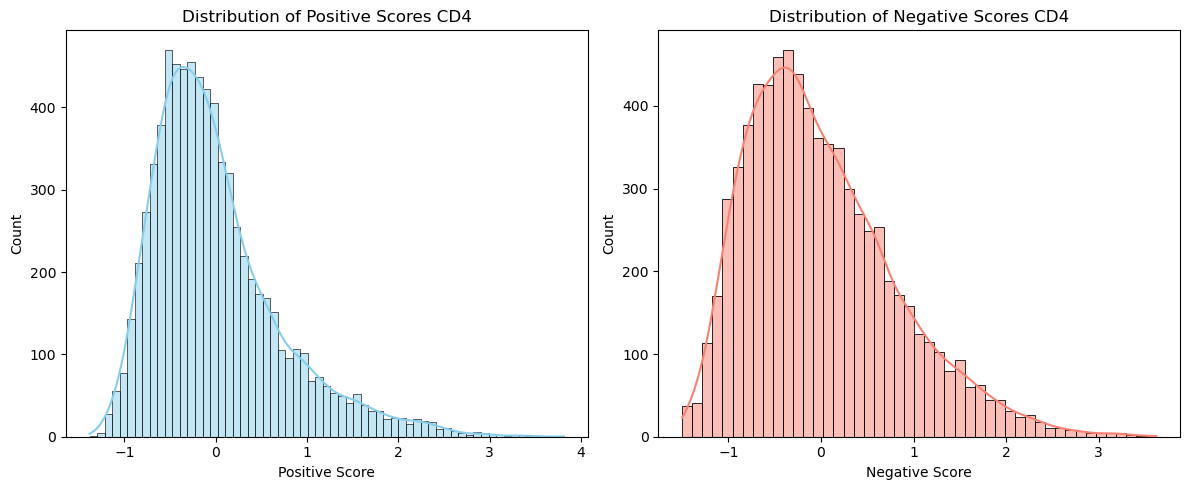

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_combined['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(df_combined['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

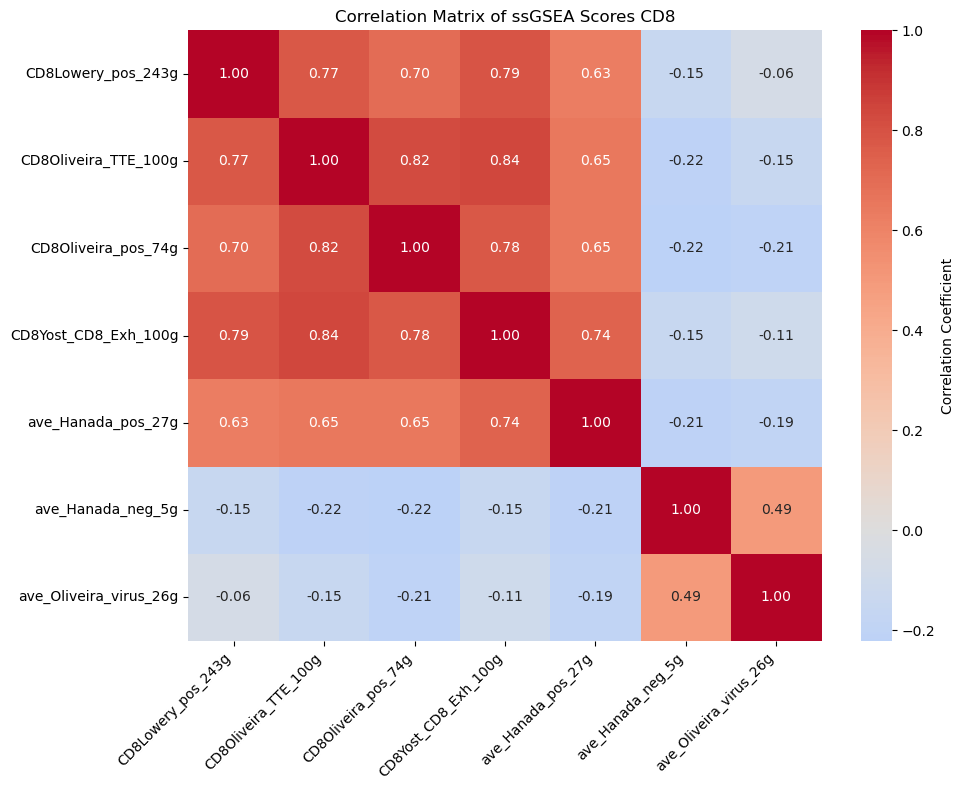

In [28]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = df_combined[df_combined['CD_type_by_cluster']=='CD8'][all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

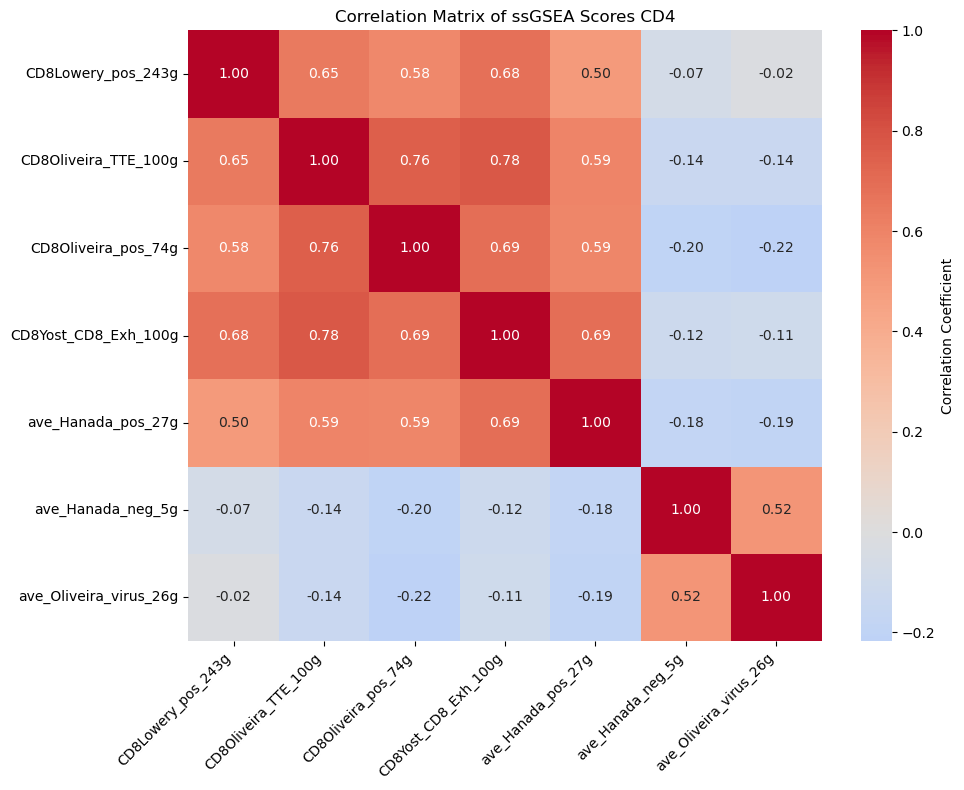

In [29]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = df_combined[df_combined['CD_type_by_cluster']=='CD4'][all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [31]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [32]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 208/230 CD4 genes are found.
 417/486 CD8 genes are found.


In [33]:
df_combined

,CD8Lowery_neg_99g,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,CD4Caushi_Tfh2_66g,CD4Hanada_neg_4g,...,cluster,CD4_score,CD8_score,CD_type_by_cluster,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4
AAACAAGCAACAGGCTATGTTGAC-1,0.294664,2.522856,3.371738,3.395399,2.930148,3.598814,-0.077901,-0.950715,0.109680,0.419003,...,5,-0.656566,3.08,CD8,3.163791,-0.514308,True,NaN,NaN,NaN
AAACAAGCAAGACATTACTTTAGG-1,0.422543,-0.625548,-0.789712,-0.383539,-0.527928,0.618407,0.390794,0.614518,0.047895,0.277222,...,6,0.686869,-0.58,CD8,-0.341664,0.502656,False,NaN,NaN,NaN
AAACAAGCAAGATGCCACTTTAGG-1,0.280893,-0.135988,-0.043401,-0.140251,-0.124163,0.393041,1.375643,0.317456,-0.688419,-0.446802,...,7,0.181818,-0.16,CD4,NaN,NaN,NaN,-0.577773,-0.315344,False
AAACAAGCAAGATGCCATGTTGAC-1,0.340535,-0.633995,-0.903479,-0.552895,-0.848714,-1.315049,0.358539,-0.889033,-0.030490,0.069882,...,3,-0.080808,-0.16,CD8,-0.850826,-0.265247,False,NaN,NaN,NaN
AAACAAGCAAGCGATC-1,0.201135,-0.096840,-0.062667,-0.072018,-0.067182,0.000000,1.452662,0.223486,-0.324023,-0.403325,...,4,-0.242424,-0.18,CD4,NaN,NaN,NaN,-0.843675,-0.798767,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAGTCCTCCATATGTTGAC-1,0.472455,2.970544,3.048282,3.298969,3.609593,2.986547,-0.255507,-0.535208,0.122240,0.124460,...,5,-0.919192,3.54,CD8,3.182787,-0.395358,True,NaN,NaN,NaN
TTTGTGAGTGGTTCTGACTTTAGG-1,0.178979,-0.128998,-0.234816,-0.675910,-0.470423,-1.124842,-0.978444,1.599914,-0.030628,0.075676,...,0,-0.141414,-0.28,CD8,-0.526998,0.310735,False,NaN,NaN,NaN
TTTGTGAGTGTCCTTCATGTTGAC-1,0.273406,0.133106,0.246296,0.170583,0.344503,1.704579,1.127349,0.173438,3.268056,0.484124,...,2,0.020202,-0.64,CD4,NaN,NaN,NaN,2.821210,0.503670,False
TTTGTGAGTTAGTTTGACTTTAGG-1,0.223631,-0.017781,0.118182,0.069174,0.112820,1.133961,1.067504,0.270663,2.082631,2.324527,...,4,1.383838,-0.70,CD4,NaN,NaN,NaN,1.551581,0.785323,False


In [34]:
cols_to_drop = [
    'SampleId', 'percent.mt', 'exp_num', 'active_ident', 'Cell_Type',
    'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_200_genes',
    'pct_counts_in_top_500_genes', 'CD8T_core9', 'CD8T_cytokine',
    'Major_cell_type', 'leiden', 'session_id'
]
df_combined.drop(columns=cols_to_drop, inplace=True)
adata.obs = adata.obs.join(df_combined)

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


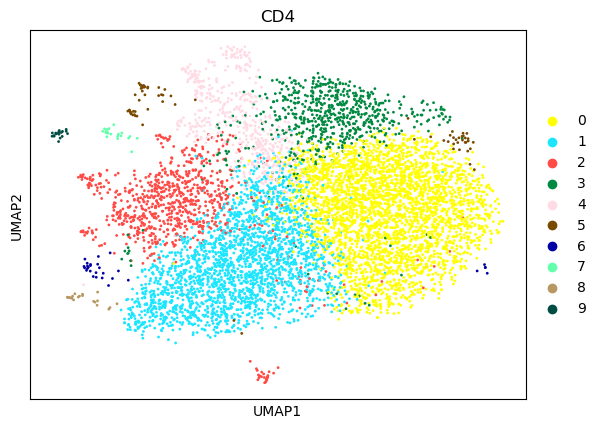

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


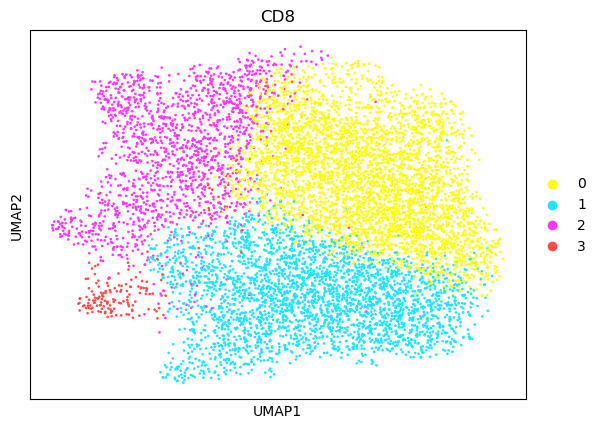

/loc/scratch/20430897/ipykernel_4232/4059185541.py:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  clusters_wide = pd.concat([leiden_cd4, leiden_cd8], sort=False)


In [35]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=15, n_pcs=25)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs.rename(columns={"leiden": f"cluster_{key}"})

cd4_mask = adata.obs["CD_type_by_cluster"]=='CD4'
cd8_mask = adata.obs["CD_type_by_cluster"]=='CD8'


leiden_cd4 = run_cluster(adata[cd4_mask, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata[cd8_mask, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], sort=False)

In [36]:
merged_df = adata.obs.join(clusters_wide[['cluster_CD4','cluster_CD8']])
merged_df

,SampleId,percent.mt,exp_num,active_ident,Cell_Type,n_genes_by_counts,total_counts,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,CD8T_core9,...,CD8_score,CD_type_by_cluster,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,cluster_CD8
AAACAAGCAAGCGATC-1,9142_s2,1.036269,9142,NaN,T memory cells,507,579.0,46.977547,98.791019,-0.414785,...,-0.18,CD4,NaN,NaN,NaN,-0.843675,-0.798767,False,1,NaN
AAACCAATCACTGTCA-1,9142_s2,2.550091,9142,NaN,T cells,475,549.0,49.908925,100.000000,0.169314,...,-0.22,CD8,-0.974602,2.720243,False,NaN,NaN,NaN,NaN,1
AAACTGGGTCATGATC-1,9142_s2,0.941620,9142,NaN,T memory cells,462,531.0,50.659134,100.000000,-0.431116,...,-0.28,CD4,NaN,NaN,NaN,-0.435720,-0.982728,False,0,NaN
AAACTGGGTTGCACTG-1,9142_s2,1.679104,9142,NaN,T memory cells,464,536.0,50.746269,100.000000,-0.456260,...,0.70,CD4,NaN,NaN,NaN,-0.731722,-0.528062,False,3,NaN
AAAGCGAAGACTCCTA-1,9142_s2,0.751697,9142,NaN,T cells,2706,4124.0,22.890398,39.597478,0.032277,...,-0.82,CD8,0.747886,1.197311,False,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTAGTCAGTTTCGGCATGTTGAC-1,10284_s4,6.644675,10284,7_T cells,T cells,1557,2122.0,31.621112,50.188501,-0.459254,...,-0.92,CD8,-0.108565,0.923132,False,NaN,NaN,NaN,NaN,1
TTTCGCGCACCGGCAAATGTTGAC-1,10284_s4,3.396603,10284,8_T cells,T cells,817,1001.0,38.361638,68.331668,0.497221,...,2.48,CD8,-0.603323,1.843998,False,NaN,NaN,NaN,NaN,1
TTTGCGGGTATGGGACATGTTGAC-1,10284_s4,2.406015,10284,7_T cells,T cells,567,665.0,44.812030,89.924812,-0.210418,...,-0.24,CD4,NaN,NaN,NaN,0.268021,1.137145,False,1,NaN
TTTGCGGGTGCGGCTTATGTTGAC-1,10284_s4,3.059273,10284,7_T cells,T cells,476,523.0,47.227533,100.000000,-0.483018,...,-0.18,CD4,NaN,NaN,NaN,-0.743012,-0.483123,False,0,NaN


In [37]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["CD_type_by_cluster"]=='CD4'
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["CD_type_by_cluster"]=='CD4'
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)
is_cd4 = merged_df["CD_type_by_cluster"]=='CD4'

merged_df["cell_type"] = np.where(is_cd4, "CD4", "CD8")

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["cell_type", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

# if you want to inspect it as a nice DataFrame:
cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df



,cell_type,cluster,reactive_fraction
0,CD4,0,0.099200
1,CD4,1,0.398839
2,CD4,2,0.577256
3,CD4,3,0.120980
4,CD4,4,0.147002
5,CD4,5,0.253521
6,CD4,6,0.448276
7,CD4,7,0.190476
8,CD4,8,0.100000
9,CD4,9,0.350000


In [38]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs

{('CD4', '2'), ('CD4', '6'), ('CD8', '2'), ('CD8', '3')}

In [39]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["cell_type"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

,SampleId,percent.mt,exp_num,active_ident,Cell_Type,n_genes_by_counts,total_counts,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,CD8T_core9,...,neg_score_CD8,cancer_reactive_per_cell_CD8,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,cluster_CD8,cancer_reactive_per_cell,cell_type,cancer_reactive_by_cluster
AAACAAGCAAGCGATC-1,9142_s2,1.036269,9142,NaN,T memory cells,507,579.0,46.977547,98.791019,-0.414785,...,NaN,NaN,-0.843675,-0.798767,False,1,NaN,False,CD4,False
AAACCAATCACTGTCA-1,9142_s2,2.550091,9142,NaN,T cells,475,549.0,49.908925,100.000000,0.169314,...,2.720243,False,NaN,NaN,NaN,NaN,1,False,CD8,False
AAACTGGGTCATGATC-1,9142_s2,0.941620,9142,NaN,T memory cells,462,531.0,50.659134,100.000000,-0.431116,...,NaN,NaN,-0.435720,-0.982728,False,0,NaN,False,CD4,False
AAACTGGGTTGCACTG-1,9142_s2,1.679104,9142,NaN,T memory cells,464,536.0,50.746269,100.000000,-0.456260,...,NaN,NaN,-0.731722,-0.528062,False,3,NaN,False,CD4,False
AAAGCGAAGACTCCTA-1,9142_s2,0.751697,9142,NaN,T cells,2706,4124.0,22.890398,39.597478,0.032277,...,1.197311,False,NaN,NaN,NaN,NaN,1,False,CD8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTAGTCAGTTTCGGCATGTTGAC-1,10284_s4,6.644675,10284,7_T cells,T cells,1557,2122.0,31.621112,50.188501,-0.459254,...,0.923132,False,NaN,NaN,NaN,NaN,1,False,CD8,False
TTTCGCGCACCGGCAAATGTTGAC-1,10284_s4,3.396603,10284,8_T cells,T cells,817,1001.0,38.361638,68.331668,0.497221,...,1.843998,False,NaN,NaN,NaN,NaN,1,False,CD8,False
TTTGCGGGTATGGGACATGTTGAC-1,10284_s4,2.406015,10284,7_T cells,T cells,567,665.0,44.812030,89.924812,-0.210418,...,NaN,NaN,0.268021,1.137145,False,1,NaN,False,CD4,False
TTTGCGGGTGCGGCTTATGTTGAC-1,10284_s4,3.059273,10284,7_T cells,T cells,476,523.0,47.227533,100.000000,-0.483018,...,NaN,NaN,-0.743012,-0.483123,False,0,NaN,False,CD4,False


In [40]:
merged_df.to_csv("cell_meta_data_output.csv", index=True)